In [16]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    dbname="sql_project_github",
    user="postgres",
    password="***********"
)

# Function to fetch query results
def fetch_data(query):
    return pd.read_sql(query, conn)


C:\Users\manos\AppData\Local\Temp\ipykernel_20540\714672565.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


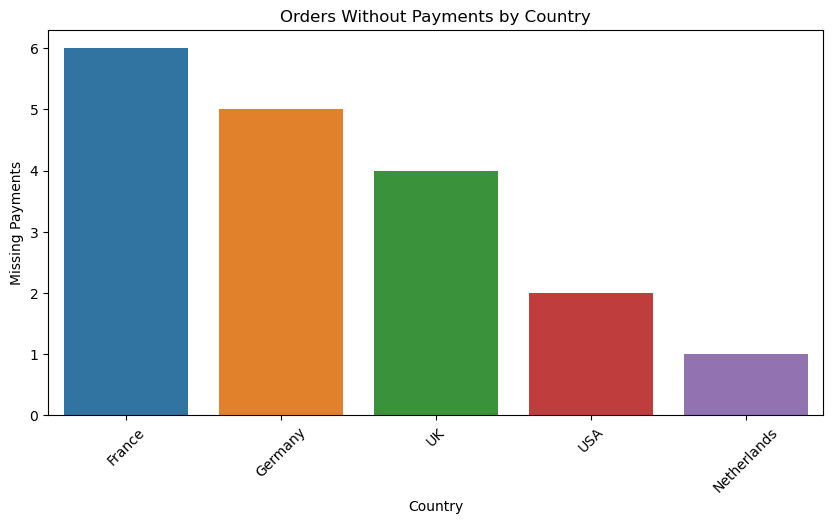

In [17]:
# Orders Without Payments (Bar Chart by Country)

query = """
SELECT o.Country, COUNT(o.OrderID) AS MissingPayments
FROM orders o
LEFT JOIN payments p ON o.OrderID = p.OrderID
WHERE p.OrderID IS NULL
GROUP BY o.Country
ORDER BY MissingPayments DESC;
"""

df_missing = fetch_data(query)

plt.figure(figsize=(10,5))
sns.barplot(x=df_missing["country"], y=df_missing["missingpayments"])
plt.title("Orders Without Payments by Country")
plt.xlabel("Country")
plt.ylabel("Missing Payments")
plt.xticks(rotation=45)
plt.show()

C:\Users\manos\AppData\Local\Temp\ipykernel_20540\714672565.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


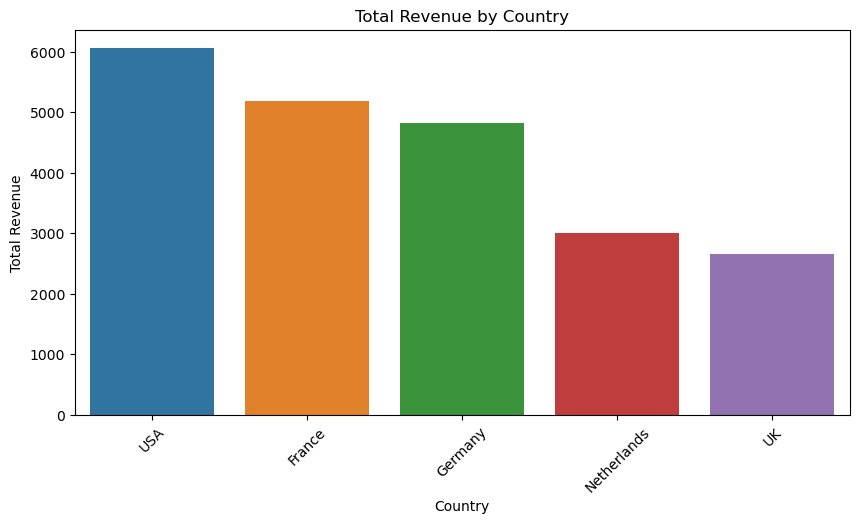

In [18]:
# Total Revenue Per Country (Bar Chart)

query = """
SELECT o.Country, SUM(p.TotalAmount) AS TotalRevenue
FROM orders o
JOIN payments p ON o.OrderID = p.OrderID
GROUP BY o.Country
ORDER BY TotalRevenue DESC;
"""

df_revenue = fetch_data(query)

plt.figure(figsize=(10,5))
sns.barplot(x=df_revenue["country"], y=df_revenue["totalrevenue"])
plt.title("Total Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

C:\Users\manos\AppData\Local\Temp\ipykernel_20540\714672565.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


<Figure size 1000x500 with 0 Axes>

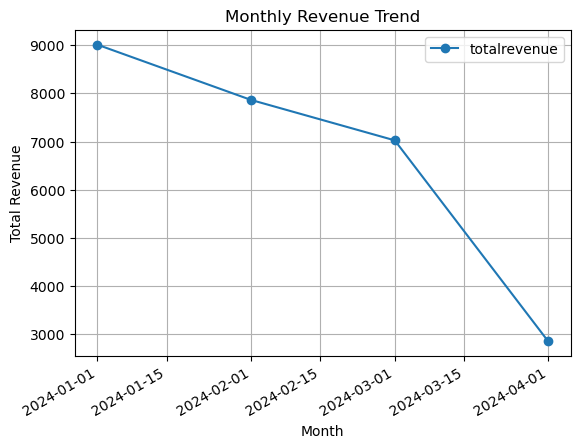

In [19]:
# Monthly Revenue Trends (Line Chart)

query = """
SELECT DATE_TRUNC('month', i.InvoiceDate) AS Month, SUM(i.TotalAmount) AS TotalRevenue
FROM invoices i
GROUP BY Month
ORDER BY Month;
"""

df_monthly = fetch_data(query)

plt.figure(figsize=(10,5))
df_monthly.plot(x="month", y="totalrevenue", kind="line", marker="o", title="Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

C:\Users\manos\AppData\Local\Temp\ipykernel_20540\714672565.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


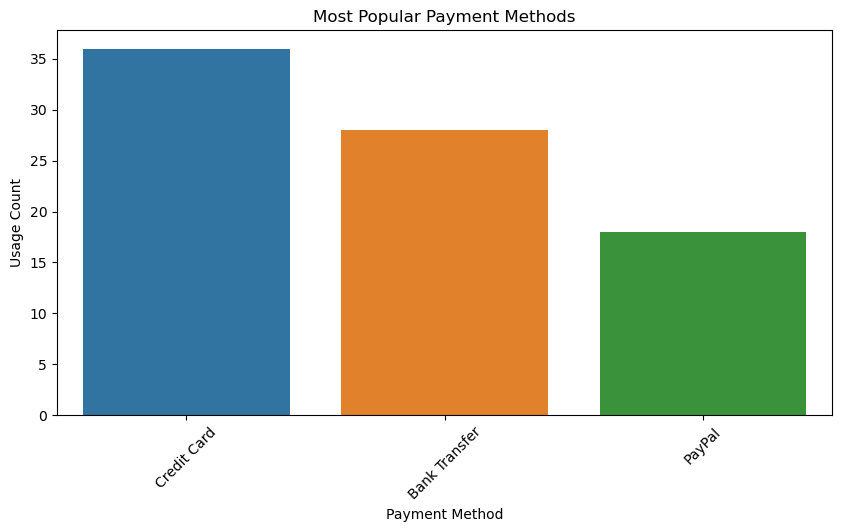

In [21]:
# Most Popular Payment Method (Bar Chart)

query = """
SELECT p.PaymentMethod, COUNT(*) AS UsageCount
FROM payments p
GROUP BY p.PaymentMethod
ORDER BY UsageCount DESC;
"""

df_payments = fetch_data(query)

plt.figure(figsize=(10,5))
sns.barplot(x=df_payments["paymentmethod"], y=df_payments["usagecount"])
plt.title("Most Popular Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Usage Count")
plt.xticks(rotation=45)
plt.show()